# CNN for MNIST with EDA and Visualization

This code builds a Convolutional Neural Network (CNN) to classify handwritten digits from the MNIST dataset. The goal is to first explore the dataset using exploratory data analysis (EDA) and visualization, then train a CNN model to classify the digits.

> Import Libraries and Load Dataset

In [50]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

    Keras libraries: For building and training the CNN.
    Matplotlib and Seaborn: Used for visualization.
    NumPy and Pandas: For data manipulation.

In [51]:
# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

    The MNIST dataset is loaded. X_train and X_test are the images, while y_train and y_test are the corresponding labels.

> Dataset Information

In [52]:
# Basic Information
print(f"Training data shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Labels: {y_test.shape}")

Training data shape: (60000, 28, 28), Labels: (60000,)
Testing data shape: (10000, 28, 28), Labels: (10000,)


This prints the shapes of the training and testing datasets. X_train and X_test are 28x28 pixel grayscale images, while y_train and y_test contain the class labels.

> Distribution of Labels

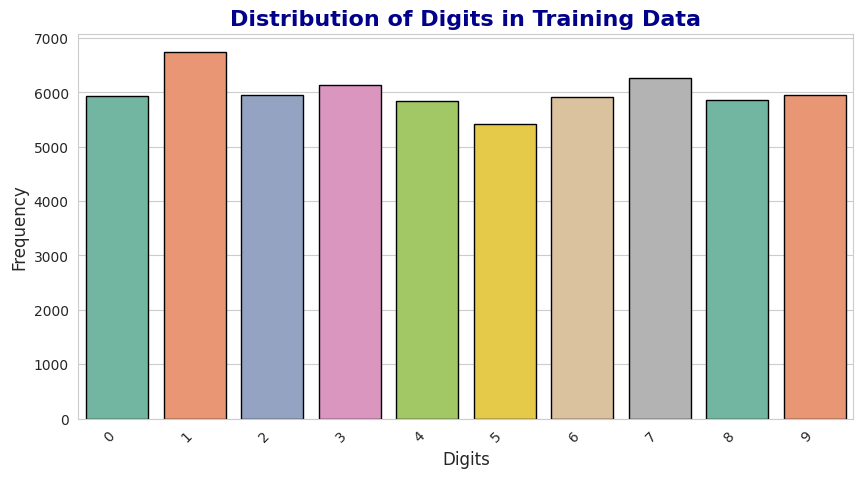

In [53]:
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")  # Set a nice background grid
sns.countplot(x=y_train, hue=y_train, palette="Set2", edgecolor="black", legend=False) # Use a color palette and edge color
plt.title("Distribution of Digits in Training Data", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Digits", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.show()


    sns.countplot: Visualizes the frequency distribution of the labels (digits 0-9).
    This helps to see if the dataset is balanced.

> Visualize Sample Images

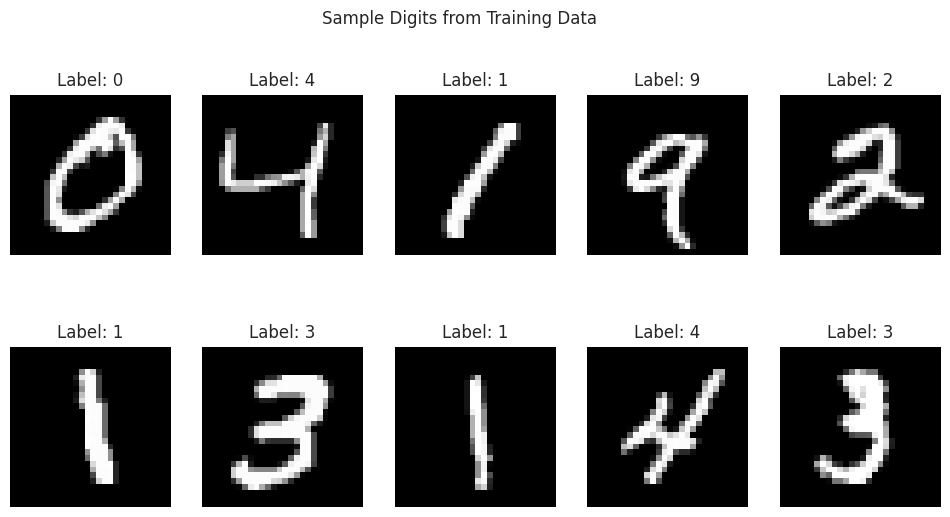

In [54]:
# Visualize some examples
def plot_samples(data, labels, title):
    plt.figure(figsize=(12, 6))
    for i in range(1, 11):
        plt.subplot(2, 5, i)
        plt.imshow(data[i], cmap="gray")
        plt.title(f"Label: {labels[i]}")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

plot_samples(X_train, y_train, "Sample Digits from Training Data")

    This function plots the first 10 images from the training data, showing the digits with their labels.
    Helps visualize how the raw images look before preprocessing.

> Data Normalization and Reshaping


* Reshaping: The data is reshaped to add an extra channel dimension (grayscale images have 1 channel).
* Normalization: The pixel values are scaled to the range [0, 1] by dividing by 255.0.
* One-hot Encoding: Labels are converted to one-hot encoded vectors. For example, if y_train[i] = 3, it will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].



In [55]:
# Normalize and Reshape data
X_train, X_test = X_train.reshape(-1, 28, 28, 1) / 255.0, X_test.reshape(-1, 28, 28, 1) / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

> Display Shape After Reshaping

In [56]:
# Display first few rows of reshaped data
print(f"After reshaping: Training data shape: {X_train.shape}, Labels: {y_train.shape}")

After reshaping: Training data shape: (60000, 28, 28, 1), Labels: (60000, 10)


    Prints the new shape of the data after reshaping and one-hot encoding.

> Pixel Intensity Distribution

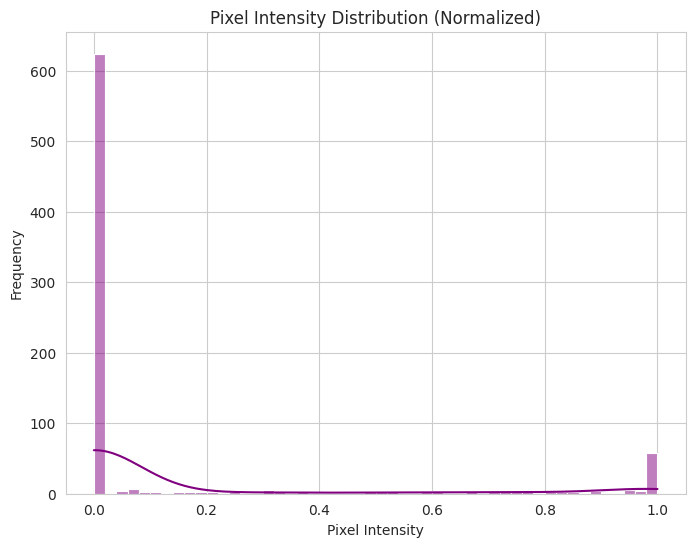

In [57]:
# Check pixel intensity distribution
plt.figure(figsize=(8, 6))
sns.histplot(X_train[0].ravel(), bins=50, color="purple", kde=True)
plt.title("Pixel Intensity Distribution (Normalized)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

    sns.histplot: Plots the histogram of pixel intensities for the first image.
    This helps understand the distribution of pixel values (normalized between 0 and 1).

> Build the CNN Model

In [58]:
# Build CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


* Conv2D Layer: The first convolutional layer with 32 filters, each of size 3x3, uses ReLU activation.
* MaxPooling2D Layer: Reduces the spatial dimensions by half, helping reduce computation and prevent overfitting.
* Dropout: Helps regularize the model and prevent overfitting by randomly setting a fraction of input units to 0 during training.
* Dense Layers: Fully connected layers, with 128 neurons in the hidden layer and 10 neurons in the output layer (one for each digit).
* Softmax Activation: Converts the raw output of the final layer into a probability distribution over 10 classes (digits 0-9).

In [59]:
# Display the model architecture
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

> Compile and Train the Model

In [60]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=2)

Epoch 1/10
1688/1688 - 9s - 5ms/step - accuracy: 0.9168 - loss: 0.2761 - val_accuracy: 0.9805 - val_loss: 0.0696
Epoch 2/10
1688/1688 - 3s - 2ms/step - accuracy: 0.9635 - loss: 0.1217 - val_accuracy: 0.9848 - val_loss: 0.0566
Epoch 3/10
1688/1688 - 5s - 3ms/step - accuracy: 0.9704 - loss: 0.0952 - val_accuracy: 0.9868 - val_loss: 0.0486
Epoch 4/10
1688/1688 - 5s - 3ms/step - accuracy: 0.9764 - loss: 0.0793 - val_accuracy: 0.9873 - val_loss: 0.0498
Epoch 5/10
1688/1688 - 4s - 2ms/step - accuracy: 0.9786 - loss: 0.0690 - val_accuracy: 0.9883 - val_loss: 0.0431
Epoch 6/10
1688/1688 - 5s - 3ms/step - accuracy: 0.9815 - loss: 0.0596 - val_accuracy: 0.9890 - val_loss: 0.0419
Epoch 7/10
1688/1688 - 4s - 3ms/step - accuracy: 0.9821 - loss: 0.0558 - val_accuracy: 0.9890 - val_loss: 0.0459
Epoch 8/10
1688/1688 - 5s - 3ms/step - accuracy: 0.9844 - loss: 0.0485 - val_accuracy: 0.9902 - val_loss: 0.0423
Epoch 9/10
1688/1688 - 4s - 2ms/step - accuracy: 0.9858 - loss: 0.0453 - val_accuracy: 0.9890 - 

* Adam Optimizer: Optimizes the model parameters during training.
* Categorical Crossentropy Loss: The loss function used for multi-class classification.
* Metrics: Accuracy is used to evaluate the model’s performance.

> Evaluate the Model

In [61]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9832 - loss: 0.0451
Test Accuracy: 0.99


    Model Evaluation: The model is evaluated on the test set to check how well it generalizes to new, unseen data.

> Plot Training History

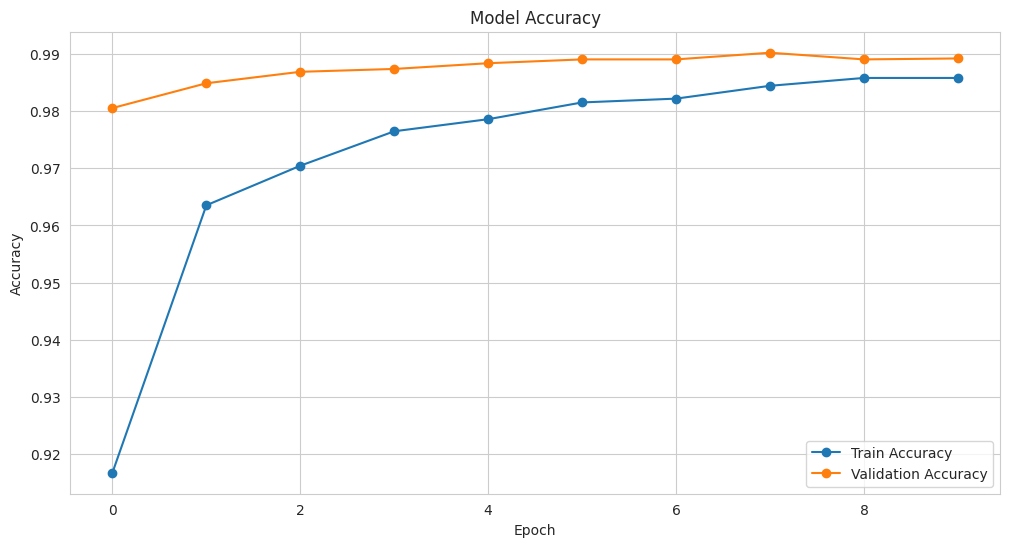

In [62]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

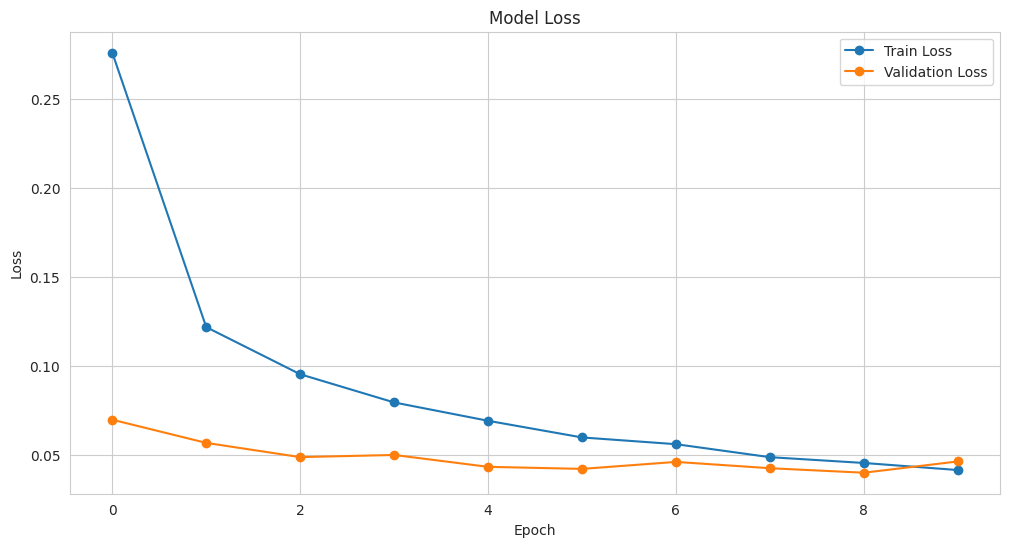

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

    Accuracy and Loss Curves: The training and validation accuracy/loss are plotted to show the model's performance during training.
    Helps visualize if the model is overfitting or underfitting.

This code demonstrates how to load the MNIST dataset, preprocess it for a CNN, and then build, train, and evaluate a CNN model for digit classification. The EDA and visualization steps help understand the dataset and the data distribution, allowing us to make better-informed decisions during the modeling process.